In [1]:
# The code was removed by Watson Studio for sharing.

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [2]:
class_info_df = df_data_0
                

In [3]:

body = client_238dc423176344d29f7203f00e02e5d5.get_object(Bucket='mlproject-donotdelete-pr-qfouepob2svnah',Key='stage_2_train_labels.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body)
df_data_1.head()


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [4]:
train_labels_df  =df_data_1


In [5]:
!pip install pandas_profiling

     |████████████████████████████████| 133kB 14.2MB/s eta 0:00:01
     |████████████████████████████████| 614kB 22.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: /home/dsxuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /home/dsxuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [6]:
class_train_df=class_info_df.merge(train_labels_df,left_on='patientId',right_on='patientId',how='inner')

In [7]:
class_train_df.head()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1


In [8]:
import pandas_profiling as pdf
pdf.ProfileReport(class_train_df)

In [9]:
from matplotlib import pyplot as plt
import seaborn as sn

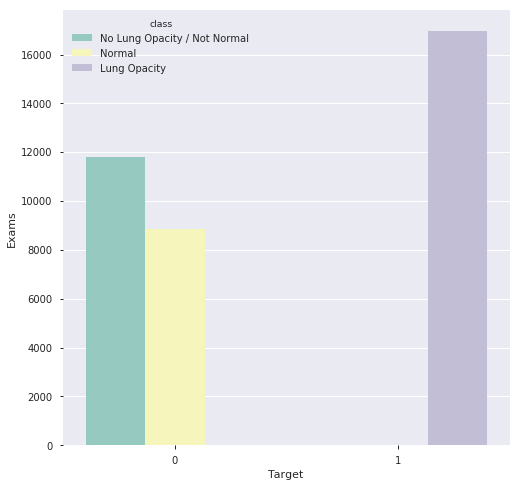

In [10]:
f,ax=plt.subplots(1,figsize=(8,8))
data=class_train_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': data.values}, index=data.index).reset_index()
sn.barplot(data=df,ax=ax,palette='Set3',x = 'Target', y='Exams',hue='class')

In [11]:
from matplotlib.patches import Rectangle

# plotting  the distribution of data 

<Figure size 432x288 with 0 Axes>

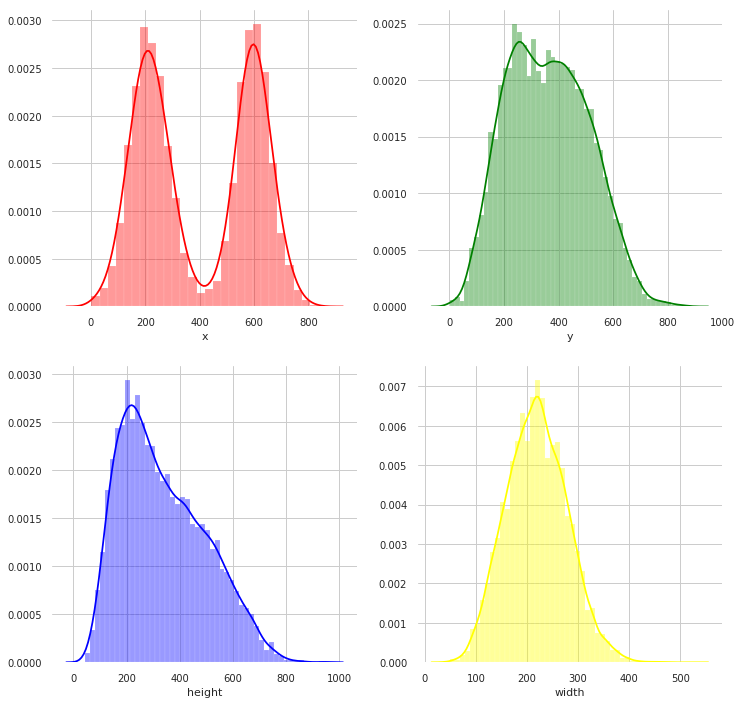

In [12]:
target1=class_train_df[class_train_df.Target==1]
sn.set_style('whitegrid')
plt.figure()
fig,ax=plt.subplots(2,2,figsize=(12,12))
sn.distplot(target1['x'],ax=ax[0,0],color="red")
sn.distplot(target1['y'],ax=ax[0,1],color="green")
sn.distplot(target1['height'],ax=ax[1,0],color="blue")
sn.distplot(target1['width'],ax=ax[1,1],color="yellow")

In [13]:
target1.head()


,patientId,class,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
6,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
7,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
10,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1


# patching  centers of rectangles for each patient with target=1

In [14]:
from matplotlib.patches import Rectangle

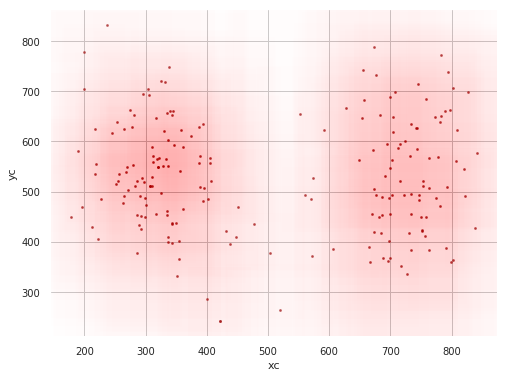

In [15]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
target1_sample=target1.sample(200)
target1_sample['xc']=target1['x']+target1['width']/2
target1_sample['yc']=target1['y']+target1['height']/2
#target1_sample.head(5)
target1_sample.plot.scatter(x='xc',y='yc',ax=ax,color='brown',alpha=0.8,marker=".")
for i,records in target1_sample.iterrows():
    ax.add_patch(Rectangle(xy=(records['x'],records['y']),width=records['width'],
                           height=records['height'], color="red",alpha=5.5e-3))


In [16]:
class_train_df.head()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1


In [30]:
#tmp=class_train_df.groupby(['patientId','class','Target'])['patientId'].count()
#tmp
tmp[tmp.'patientId'='000db696-cf54-4385-b10b-6b16fbb3f985']

SyntaxError: invalid syntax (<ipython-input-30-59c896e5fa78>, line 3)